# There is a 40% chance of getting a score of 10 in one round of Frogger. What is the probability that the bot gets a score of 7 4 times in 10 trials?
In this case, we need to assume that the player attempts to pass the trial, and that 40% of the time, they will succeed. The random variable is the probability of succeeding. One trial would be the player running the trial until they win.

In [21]:
import math
x=4
a=x-1
p=.20
q=1-p
tProb = (q**a)*p
print(tProb)

0.10240000000000003


In [6]:
!pip install ale-py
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [ ]:
# First, make sure the pip install commands are executed properly
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install gymnasium[accept-rom-license]

# After installation, you may need to restart the kernel
# Use the following command to restart the kernel programmatically
# Or manually restart the kernel from the Jupyter notebook menu
import os
os.kill(os.getpid(), 9)

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

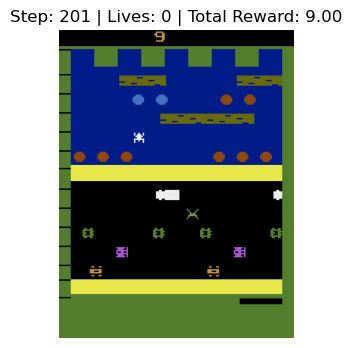

All lives lost. Ending trial.


In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment (no SDL window — uses image frames)
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")

obs, info = env.reset()
lives = info.get("lives", 3)
total_reward = 0

# Setup live display
plt.ion()
fig, ax = plt.subplots(figsize=(4, 4))

for step in range(10000):  # safety limit
    action = env.action_space.sample()  # random AI for now
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # Get current lives from info
    current_lives = info.get("lives", lives)

    # Update the frame display
    clear_output(wait=True)
    ax.imshow(obs)
    ax.set_title(f"Step: {step} | Lives: {current_lives} | Total Reward: {total_reward:.2f}")
    ax.axis("off")
    display(fig)
    plt.pause(0.001)

    # Stop conditions
    if current_lives == 0:
        print("All lives lost. Ending trial.")
        break
    if terminated or truncated:
        print("Game over or environment truncated.")
        break

    lives = current_lives

plt.ioff()
env.close()


In [18]:
import gymnasium as gym
import numpy as np

# --- Settings ---
NUM_TRIALS = 100

env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")

trial_rewards = []
deaths_after_first_forward = 0  # count deaths right after first forward move

for trial in range(1, NUM_TRIALS + 1):
    obs, info = env.reset()
    lives = info.get("lives", 3)
    total_reward = 0

    first_forward_moved = False  # flag: has Frog moved forward yet?
    alive_before_forward = lives
    died_after_forward = False

    for step in range(10000):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        current_lives = info.get("lives", lives)

        # --- Detect first forward move ---
        # For ALE Frogger, "UP" (forward) is usually action 2.
        # You can verify with: env.unwrapped.get_action_meanings()
        if not first_forward_moved and action == 2:
            first_forward_moved = True
            alive_before_forward = current_lives  # remember how many lives before move

        # --- Detect death after the first forward move ---
        if first_forward_moved and not died_after_forward:
            # If a life was lost or game ended right after the forward move
            if current_lives < alive_before_forward or terminated or truncated:
                deaths_after_first_forward += 1
                died_after_forward = True  # only count once per trial

        # --- Stop when game over ---
        if current_lives == 0 or terminated or truncated:
            break

        lives = current_lives

    trial_rewards.append(total_reward)
    print(f"Trial {trial} finished with total reward: {total_reward:.2f}")

env.close()

# --- Summary ---
print("\nAll trials complete!")
print(f"Average reward over {NUM_TRIALS} trials: {np.mean(trial_rewards):.2f}")
print(f"Max reward: {np.max(trial_rewards):.2f}")
print(f"Min reward: {np.min(trial_rewards):.2f}")
print(f"\nDeaths immediately after first forward move: {deaths_after_first_forward} / {NUM_TRIALS}")
print(f"Percentage: {100 * deaths_after_first_forward / NUM_TRIALS:.1f}%")


Trial 1 finished with total reward: 9.00
Trial 2 finished with total reward: 8.00
Trial 3 finished with total reward: 6.00
Trial 4 finished with total reward: 7.00
Trial 5 finished with total reward: 5.00
Trial 6 finished with total reward: 6.00
Trial 7 finished with total reward: 5.00
Trial 8 finished with total reward: 6.00
Trial 9 finished with total reward: 6.00
Trial 10 finished with total reward: 7.00
Trial 11 finished with total reward: 7.00
Trial 12 finished with total reward: 6.00
Trial 13 finished with total reward: 9.00
Trial 14 finished with total reward: 5.00
Trial 15 finished with total reward: 8.00
Trial 16 finished with total reward: 6.00
Trial 17 finished with total reward: 5.00
Trial 18 finished with total reward: 5.00
Trial 19 finished with total reward: 6.00
Trial 20 finished with total reward: 7.00
Trial 21 finished with total reward: 6.00
Trial 22 finished with total reward: 8.00
Trial 23 finished with total reward: 9.00
Trial 24 finished with total reward: 6.00
T

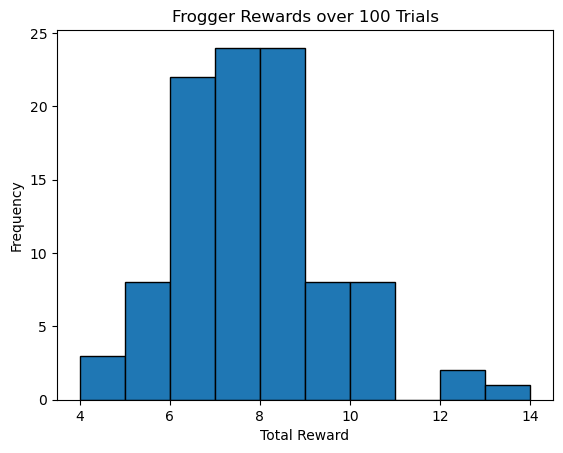

In [3]:
import matplotlib.pyplot as plt

plt.hist(trial_rewards, bins=10, edgecolor="black")
plt.title(f"Frogger Rewards over {NUM_TRIALS} Trials")
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
plt.show()

In [20]:
group_size = 10
exactly_four_success_groups = 0

for i in range(0, len(trial_rewards), group_size):
    group = trial_rewards[i:i+group_size]
    
    # Count how many trials in this group had reward >= 8
    successes = sum(1 for reward in group if reward >= 7)
    
    # Count the group only if there are exactly 4 such successes
    if successes == 4:
        exactly_four_success_groups += 1

# Compute probability across all 10-trial groups
num_groups = len(trial_rewards) / group_size
eProb = exactly_four_success_groups / num_groups

print(f"Empirical probability of exactly 4/10 trials with reward ≥7: {eProb:.3f}")


Empirical probability of exactly 4/10 trials with reward ≥7: 0.200


# Answer:

The empirical probability of exactly 4/10 trials ending with a reward greater than or equal to seven is 20%, which is almost twice as large as our guessed theoretical probability of 10.24%